<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [7]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

nlp = spacy.load("en_core_web_lg")

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [3]:
import pandas as pd

In [129]:
df = pd.read_csv('./data/job_listings.csv')

In [130]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [131]:
# Remove brackets from descriptions
df['description'] = df['description'].str.replace('<', ' ').str.replace('>', ' ').str.replace('/', ' ').str.replace('\n', ' ').str.replace('\\n', ' ')

In [132]:
df['description'].head()

0    b" div  div Job Requirements:  div  ul  li  p ...
1    b' div Job Description br  \n br  \n p As a Da...
2    b' div  p As a Data Scientist you will be work...
3    b' div class="jobsearch-JobMetadataHeader icl-...
4    b' ul  li Location: USA \xe2\x80\x93 multiple ...
Name: description, dtype: object

In [133]:
df['lemmas'] = df['description'].apply(lambda text: [token.lemma_ for token in nlp(text) if (token.is_stop != True) and (token.is_punct != True)])

In [134]:
df['lemmas'].head()

0    [b, div,  , div, job, requirement,  , div,  , ...
1    [b, div, job, description, br,  , \n, br,  , \...
2    [b, div,  , p, Data, scientist, work, consult,...
3    [b, div, class="jobsearch, JobMetadataHeader, ...
4    [b, ul,  , li, location, USA, \xe2\x80\x93, mu...
Name: lemmas, dtype: object

In [70]:
from collections import Counter
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [135]:
wc = count(df['lemmas'])
wc[wc['rank'] <= 20]['word'].values

array([' ', 'li', 'div', '  ', '\\n', 'p', 'br', 'b', 'datum', 'ul',
       'experience', 'work', 'team', 'business', 'Data', 'product',
       'model', 'analysis', 'data', 'analytic'], dtype=object)

In [136]:
stop_words = set([' ', 'li', 'div', '  ', '\\n', 'p', 'br', 'b', 'ul',
                  'h1', 'h2', 'h3',
                  'said', 'people', 'mr',
                  '000', '10', '100', '2019', '40', '401',
                   'x80', 'x93', 'x99', 'x99ll', 'x99re', 'x99s', 'x9d', 'xe2'
                  ])
# Remove custom stop words
lis = []
for l in df['lemmas']:
    lis.append(list(set(l) - stop_words))

df['lemmas'] = lis

In [137]:
df['data'] = df['lemmas'].str.join(' ')

In [138]:
df['data'].head()

0    Decision ability Neural like understanding Kag...
1    Math motivate creative information colleague \...
2    meaningful Math Scientist responsible analyze ...
3    online md app federal research CalMHSA faculty...
4    data handle 2 transformation Analytics USA pre...
Name: data, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [139]:
vect = CountVectorizer(stop_words=nlp.Defaults.stop_words.union(stop_words), min_df=0.05, max_df=.98)
dtm = vect.fit_transform(df['data'].values)
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [140]:
dtm.head()

,ability,able,academic,accelerate,accept,access,accommodation,accuracy,achieve,acquisition,...,workforce,workplace,world,write,writing,www,xs,year,years,york
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 4) Visualize the most common word counts

In [104]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
top20 = dtm.sum().sort_values(ascending=False)[0:20]

In [143]:
top20.index

Index(['data', 'science', 'experience', 'scientist', 'team', 'datum', 'work',
       'business', 'learning', 'analysis', 'python', 'machine', 'opportunity',
       'product', 'year', 'skill', 'engineering', 'degree', 'technology',
       'model'],
      dtype='object')

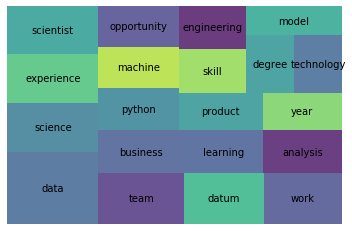

In [144]:
squarify.plot(sizes=top20, label=top20.index, alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [149]:
tfidf = TfidfVectorizer(stop_words=nlp.Defaults.stop_words.union(stop_words), min_df=0.05, max_df=.98)
dtm = tfidf.fit_transform(df['data'].values)
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [150]:
dtm.head()

,ability,able,academic,accelerate,accept,access,accommodation,accuracy,achieve,acquisition,...,workforce,workplace,world,write,writing,www,xs,year,years,york
0,0.096864,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.116788,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.044673,0.0,0.0,0.0,0.0,0.0,0.0,0.090708,0.0,0.0,...,0.0,0.0,0.047189,0.053863,0.0,0.0,0.000000,0.037332,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.093829,0.047134,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.161296,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [151]:
from sklearn.neighbors import NearestNeighbors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [152]:
nn.kneighbors([dtm.iloc[2]])

(array([[0.        , 1.20821271, 1.21704118, 1.23188816, 1.2416428 ]]),
 array([[  2, 307, 407, 408, 198]], dtype=int64))

In [157]:
nn.kneighbors(tfidf.transform([df['data'].values[2]]).todense())

(array([[0.        , 1.20821271, 1.21704118, 1.23188816, 1.2416428 ]]),
 array([[  2, 307, 407, 408, 198]], dtype=int64))

In [158]:
df['data'].values[2]

'meaningful Math Scientist responsible analyze aspect \\nprimary pattern relevant \\nthis Python typical actionable combine h3 skill lead research consult dataset recommendation modeling Applied presentation phd Physics testing Science algorithm Sacramento large perform datum field learning statistical Engineering Computer job option analytic math analytical model support validation scientist class="jobSectionHeader position home identify complex thorough Statistics location \\nBachelors r \\nexperience build advanced predictive machine available business MS work \\nqualification Data leverage \\nAbility communication prefer'

In [162]:
text = 'Looking for a data scientist capable with mathematics and machine learning methods for the purposes of developing tools for automating formalized mathematics and verified software.'
text = ' '.join([token.lemma_ for token in nlp(text) if (token.is_stop != True) and (token.is_punct != True)])
nn.kneighbors(tfidf.transform([text]).todense())

(array([[1.23822523, 1.28973117, 1.29674596, 1.29703868, 1.29930293]]),
 array([[ 17,  61,  54, 424, 382]], dtype=int64))

In [165]:
df['description'].iloc[17]

'b\' div class="jobsearch-JobMetadataHeader icl-u-xs-mb--md"  div class="jobsearch-JobMetadataHeader-item icl-u-xs-mt--xs" Contract  div   div  div  div We are looking to hire for a Data Scientist (Remote). br  \\n br  \\n b Qualifications:  b   div  ul  li \\nThis job is for a Data Scientist who is an expert in Python.  li  li \\nDeveloper should also have basic experience with postgres database.  li  li \\nGoal is to develop a general purpose script that creates various models for user imported datasets and choose the best model for making predictions.  li  li \\nMust be American citizen authorized to work in US.  li   ul  div  br  \\n  div  div  b \\nOverview of work :  b   div  ul  li \\nDeveloper will be working on an already built product that requires new features and bug fixing .  li  li \\nSelf testing and bug fixing is an important part of the job. Product is a tool that automates machine learning and makes natural language search and predictions on user imported data.  li  l

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 

In [202]:
from sklearn.cluster import SpectralClustering

In [225]:
vars = []

for i in range(2, 23):
    sc = SpectralClustering(n_clusters=i,
         assign_labels="discretize",
         random_state=0)

    sc.fit(dtm)
    
    vars.append(pd.Series(sc.labels_).value_counts().var())

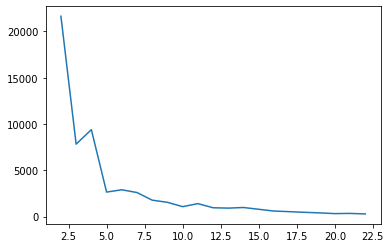

In [226]:
# Elbow at 5?
plt.plot(range(2, 23), vars)

In [227]:
sc = SpectralClustering(n_clusters=5,
         assign_labels="discretize",
         random_state=0)

sc.fit(dtm)

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=5, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=0)

In [228]:
sc.labels_

array([4, 0, 4, 2, 4, 4, 0, 2, 4, 0, 4, 2, 4, 0, 0, 0, 2, 1, 2, 1, 2, 2,
       0, 0, 4, 4, 4, 0, 4, 1, 1, 2, 2, 4, 4, 2, 4, 3, 2, 1, 2, 0, 4, 4,
       2, 4, 4, 4, 1, 4, 2, 4, 2, 1, 0, 2, 1, 1, 1, 1, 4, 2, 4, 1, 0, 2,
       0, 1, 2, 2, 2, 4, 4, 0, 1, 4, 0, 0, 1, 4, 1, 4, 2, 0, 1, 2, 3, 1,
       3, 0, 2, 4, 2, 4, 1, 0, 3, 0, 0, 2, 4, 4, 2, 0, 4, 4, 4, 0, 0, 3,
       0, 0, 0, 4, 4, 4, 1, 4, 4, 4, 2, 1, 2, 0, 2, 1, 2, 0, 0, 4, 0, 0,
       0, 4, 1, 0, 0, 4, 4, 4, 0, 0, 2, 2, 3, 4, 3, 0, 2, 1, 4, 4, 2, 4,
       4, 0, 0, 2, 0, 0, 0, 0, 2, 4, 3, 0, 0, 4, 2, 0, 0, 0, 0, 4, 2, 0,
       2, 4, 4, 0, 1, 2, 0, 2, 0, 2, 3, 4, 4, 1, 4, 0, 3, 2, 0, 2, 1, 0,
       4, 2, 2, 2, 1, 4, 1, 4, 0, 1, 4, 4, 3, 2, 2, 4, 0, 4, 2, 4, 2, 2,
       1, 0, 0, 0, 4, 0, 4, 4, 1, 2, 0, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2,
       1, 2, 0, 4, 0, 3, 2, 4, 4, 0, 3, 2, 4, 2, 2, 0, 4, 0, 4, 2, 0, 0,
       2, 4, 0, 0, 0, 2, 0, 4, 0, 2, 4, 2, 4, 4, 2, 0, 4, 0, 2, 4, 2, 0,
       0, 0, 2, 0, 2, 4, 2, 0, 4, 0, 3, 0, 4, 0, 0,

In [229]:
df['cluster'] = sc.labels_

In [230]:
df.head()

,Unnamed: 0,description,title,lemmas,data,cluster
0,0,"b"" div div Job Requirements: div ul li p ...",Data scientist,"[Decision, ability, Neural, like, understandin...",Decision ability Neural like understanding Kag...,4
1,1,b' div Job Description br \n br \n p As a Da...,Data Scientist I,"[Math, motivate, creative, information, collea...",Math motivate creative information colleague \...,0
2,2,b' div p As a Data Scientist you will be work...,Data Scientist - Entry Level,"[meaningful, Math, Scientist, responsible, ana...",meaningful Math Scientist responsible analyze ...,4
3,3,"b' div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[online, md, app, federal, research, CalMHSA, ...",online md app federal research CalMHSA faculty...,2
4,4,b' ul li Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[data, handle, 2, transformation, Analytics, U...",data handle 2 transformation Analytics USA pre...,4


In [232]:
c0 = df[df['cluster'] == 0]
c1 = df[df['cluster'] == 1]
c2 = df[df['cluster'] == 2]
c3 = df[df['cluster'] == 3]
c4 = df[df['cluster'] == 4]

C:\Users\soobt\Anaconda3\envs\jupyterlab\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


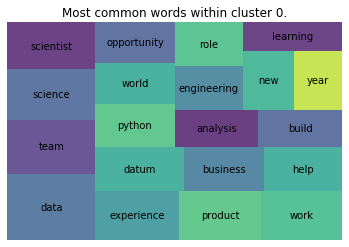

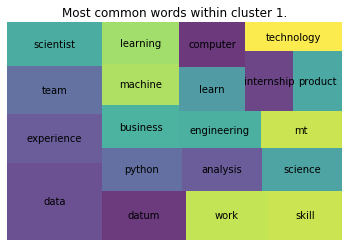

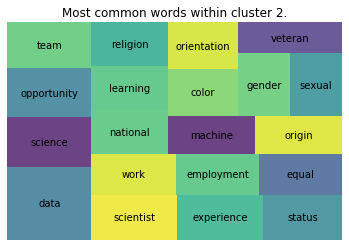

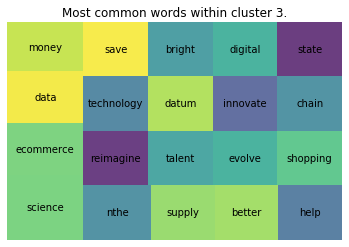

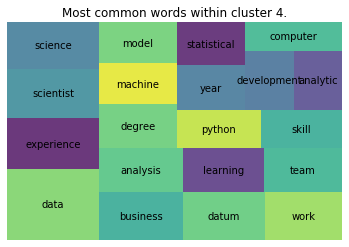

In [234]:
vect = CountVectorizer(stop_words=nlp.Defaults.stop_words.union(stop_words), min_df=0.05, max_df=.98)

for c, n in [(c0, '0'), (c1, '1'), (c2, '2'), (c3, '3'), (c4, '4')]:

    dtm = vect.fit_transform(c['data'].values)
    dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
    top20 = dtm.sum().sort_values(ascending=False)[0:20]

    squarify.plot(sizes=top20, label=top20.index, alpha=.8 )
    plt.title('Most common words within cluster ' + n + '.')
    plt.axis('off')
    plt.show()


Other than the economic bent of cluster 3, there doesn't apear to be an obvious difference among the clusters.

In [237]:
n0 = df[df['cluster'] != 0]
n1 = df[df['cluster'] != 1]
n2 = df[df['cluster'] != 2]
n3 = df[df['cluster'] != 3]
n4 = df[df['cluster'] != 4]

In [255]:
vect = TfidfVectorizer(stop_words=nlp.Defaults.stop_words.union(stop_words), min_df=0.05, max_df=.98)

yes_dtm = []

for c in [c0, c1, c2, c3, c4]:
    dtm = vect.fit_transform(c['data'].values)
    dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
    yes_dtm.append(dtm.mean())

no_dtm = []

for c in [n0, n1, n2, n3, n4]:
    dtm = vect.fit_transform(c['data'].values)
    dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
    no_dtm.append(dtm.mean())

In [286]:
yes_dtm[0].index

Index(['600', 'ability', 'able', 'academic', 'accelerate', 'access',
       'accessible', 'account', 'achieve', 'action',
       ...
       'write', 'writing', 'www', 'x94', 'x94we', 'x99ve', 'xa6', 'year',
       'years', 'york'],
      dtype='object', length=882)

In [287]:
difference_dtm = []

for i in range(5):
    new_dtm = pd.Series()
    
    new_cols = set(yes_dtm[i].index).intersection(set(no_dtm[i].index))

    for c in new_cols:
        new_dtm[c] = yes_dtm[i][c] - no_dtm[i][c]
    
    difference_dtm.append(new_dtm)

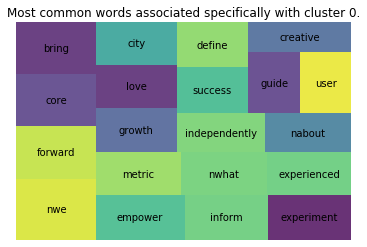

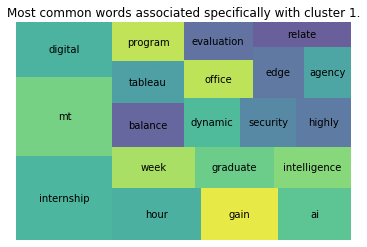

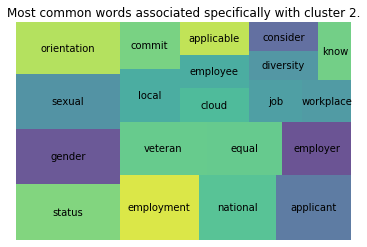

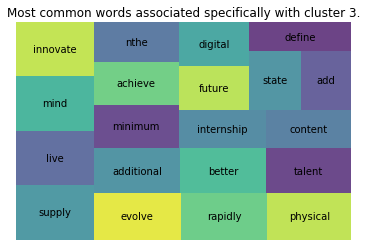

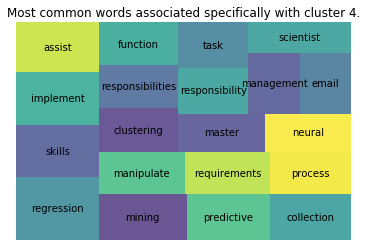

In [289]:
for i in range(5):
    top20 = difference_dtm[i].sort_values(ascending=False)[0:20]
    
    squarify.plot(sizes=top20, label=top20.index, alpha=.8 )
    plt.title('Most common words associated specifically with cluster ' + str(i) + '.')
    plt.axis('off')
    plt.show()

It's hard to put my finger on the precise differences.

Cluster 1 seems a lot more fluffy ("bring", "forward", "success", "love", "growth")

Cluster 2 seems more coporate ("office", "dynamic", "digital")

Cluster 3 seems to have many progressive buzz-words

Cluster 4 seems as corporate as cluster 2, but with different buzz-words

Cluster 5 seems to be more technical, mentioning specific tequniques ("regression", "clustering", "neural")